In [2]:
import torch
import numpy as np
import os
import joblib

In [13]:
root = "./dataset_room"
inputs = []
targets = []
for dirpath, dirnames, filenames in os.walk(root):
    for filename in filenames:
        if filename.endswith(".pt"):

                path = root + "/" + filename
                print(path)
                data = torch.load(path,weights_only=False)
                input_array = data["input"]
                target = data["output"]
                inputs.append(input_array)
                targets.append(target)
X = np.stack(inputs)
y = np.stack(targets)
print(X)

./dataset_room/15-06-2512-18-35.pt
./dataset_room/16-06-2513-30-47.pt
./dataset_room/16-06-2513-40-47.pt
./dataset_room/16-06-2514-00-46.pt
./dataset_room/16-06-2514-10-47.pt
./dataset_room/16-06-2514-30-47.pt
./dataset_room/16-06-2514-40-47.pt
./dataset_room/16-06-2515-01-18.pt
./dataset_room/16-06-2515-14-54.pt
./dataset_room/16-06-2515-34-55.pt
./dataset_room/16-06-2515-44-55.pt
./dataset_room/16-06-2516-04-54.pt
./dataset_room/16-06-2516-14-54.pt
./dataset_room/16-06-2516-34-55.pt
./dataset_room/16-06-2516-44-55.pt
./dataset_room/16-06-2517-04-54.pt
./dataset_room/16-06-2517-14-55.pt
./dataset_room/16-06-2517-34-55.pt
./dataset_room/16-06-2517-44-54.pt
./dataset_room/16-06-2518-04-55.pt
./dataset_room/16-06-2518-14-55.pt
./dataset_room/16-06-2518-29-59.pt
./dataset_room/16-06-2518-44-59.pt
./dataset_room/16-06-2518-59-59.pt
./dataset_room/16-06-2519-14-59.pt
./dataset_room/16-06-2519-29-34.pt
./dataset_room/16-06-2519-44-55.pt
./dataset_room/16-06-2520-00-08.pt
./dataset_room/16-06

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train, X_test, y_train, y_test)

[[ 15.8  12.    0.  ...  24.   21.  434. ]
 [ 20.2   3.    1.  ...  21.   21.  661. ]
 [ 19.5  13.    1.  ...  19.5  21.  381. ]
 ...
 [ 18.6  23.    1.  ...  21.5  21.  753. ]
 [ 21.7   6.    1.  ...  20.   21.  424. ]
 [ 18.6  21.    1.  ...  22.   21.  653. ]] [[ 21.7   2.    1.  ...  21.   21.  415. ]
 [ 19.5  22.    1.  ...  23.   21.  455. ]
 [ 21.2  16.    1.  ...  22.   21.  441. ]
 ...
 [ 19.3  14.    1.  ...  22.5  21.  656. ]
 [ 19.5  12.    1.  ...  19.5  21.  381. ]
 [ 20.2  22.    1.  ...  21.   21.  455. ]] [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier

print(y_train.shape)
print(X_train.shape)
base_tree = DecisionTreeClassifier(max_depth=3)
base_tree.fit(X_train, y_train)

(660,)
(660, 8)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


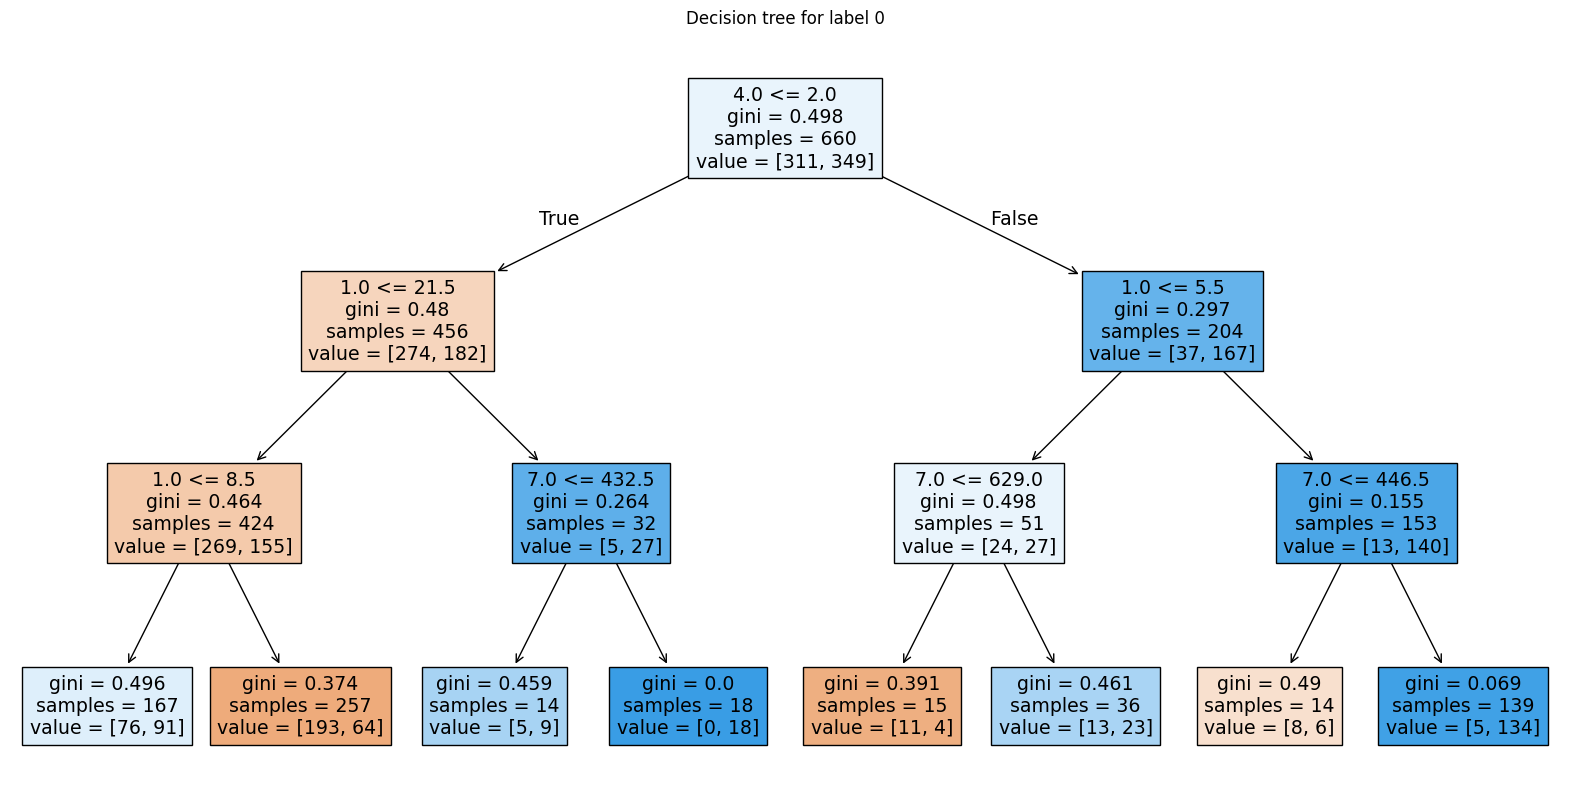

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
feature_names = np.linspace(0, 342, 343)
class_labels = ["pompe -4 mod", "pompe +2 mod", "pompe +27 mod", "cogen mod", "boilers mod"]
plot_tree(base_tree, filled=True, feature_names=feature_names)
plt.title("Decision tree for label 0")
plt.show()

In [18]:
def predict(X,clf):
    input = X
    input = input.reshape(1, -1)
    y_pred = clf.predict_proba(input)
    return y_pred
y = y_test[0]
y_pred = predict(X_test[0],base_tree)
print(f"y_pred {y_pred}")
print(f"y {y}")

probas = base_tree.predict_proba(X_test)

y_pred [[0.45508982 0.54491018]]
y 1.0


In [19]:
from sklearn.metrics import f1_score, hamming_loss
binary_preds = []
for x in X_test:
    input = x.reshape(1, -1)
    pred = base_tree.predict(input)  # Liste de 11 tableaux (1D), un par classe
    binary_preds.append(pred[0])
binary_preds = np.array(binary_preds)
print("F1 score (micro):", f1_score(y_test, binary_preds, average='micro'))
print("Hamming loss:", hamming_loss(y_test, binary_preds))

F1 score (micro): 0.7048192771084337
Hamming loss: 0.29518072289156627
